<a href="https://colab.research.google.com/github/axz91/RGC/blob/main/MRS_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
pip install nmrglue

In [62]:
import nmrglue as ng
import numpy as np
import matplotlib.pyplot as plt

# read in the data from a NMRPipe file
data = ng.fileio.bruker.read(
    dir='/content/drive/MyDrive/70_ENC2020/1/', bin_file="fid",shape=(512,36),
    pprog_file="pulseprogram")


data


/usr/local/lib/python3.10/dist-packages/nmrglue/fileio/bruker.py:394: UserWarning: Error reading the pulse program
  warn('Error reading the pulse program')


({'procs': {'_coreheader': ['##TITLE=Parameter List, ParaVision 6.0.1',
    '##JCAMPDX=4.24',
    '##DATATYPE=Parameter Values',
    '##ORIGIN=Bruker BioSpin MRI GmbH',
    '##OWNER=nmrsu'],
   '_comments': ['$$ 2019-12-07 16:32:01.949 -0500  nmrsu@CZC642BNVQ',
    '$$ /opt/PV6.0.1/data/nmrsu/20191201_181536_V9_4T_GapR_1_1/70/pdata/1/procs',
    '$$ process /opt/PV6.0.1/prog/bin/parxserver'],
   'OFFSET': 4.99568064058648,
   'SF': 400.345847521031,
   'YMAX_p': 32766,
   'YMIN_p': 1},
  'FILE_SIZE': 73728},
 array([[  -484,  -1037,    648, ...,   -931,    935,  -2360],
        [  1165,   2791,   1291, ...,    644,    -42,  -2633],
        [ -1907,    447,   3124, ...,  -5795, -12643, -11051],
        ...,
        [   -47,  -1198,    343, ...,    814,    692,  -2689],
        [  -236,     79,  -2072, ...,    154,    232,    635],
        [    68,   1508,    329, ...,   1054,    825,      7]], dtype=int32))

In [63]:
data = data[1]


In [65]:
data.shape

(512, 36)

In [66]:
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt


# READ THE 2048 X 2048 MATRIX
##############################
data_dim1 = data
#############################

# FFT the 2048 x 2048 matrix VIA THE AXIS 1
fft_data_dim1_axis_0 = np.fft.fft(data_dim1 ,axis=0)


# SHIFT OVER AXIS 1
fft_data_dim1_shift_0 = np.fft.fftshift(fft_data_dim1_axis_0,axes=(0)
)


# GET THE REAL NUMBER PART OF FIRST MATRIX, RETURN 2048 X 2048 MATRIX FOR REAL NUMBER
fft_data_dim1_real = np.real(fft_data_dim1_shift_0)
# GET THE IMAG PART OF THE FIRST MARTIX, RETURN 2048 X 2048 MATRIX FOR REAL NUMBER
fft_data_dim1_imag = np.imag(fft_data_dim1_shift_0)
# GET THE ABS VALUE OF FIRST MATRIX, RETURN 2048 X 2048 MATIRX FOR ABS VALUE
fft_data_dim1_abs = abs(fft_data_dim1_shift_0)





# FFT the 2048 x 2048 matrix VIA THE AXIA 2
fft_data_dim2_axis_1 = np.fft.fft(fft_data_dim1_shift_0,axis=1)
# SHIFT OVER AXIA 2
fft_data_dim2_shift_1 = np.fft.fftshift(fft_data_dim2_axis_1, axes=(1)
)



# GET THE REAL NUMBER PART OF SECOND MATRIX, RETURN 2048 X 2048 MATRIX FOR REAL NUMBER
fft_data_dim2_real = np.real(fft_data_dim2_shift_1)
# GET THE IMAG PART OF THE SECOND MARTIX, RETURN 2048 X 2048 MATRIX FOR REAL NUMBER
fft_data_dim2_imag = np.imag(fft_data_dim2_shift_1)
# GET THE ABS VALUE OF SECOND MATRIX, RETURN 2048 X 2048 MATIRX FOR ABS VALUE
fft_data_dim2_abs = np.abs(fft_data_dim2_shift_1)


In [33]:
import numpy as np
import matplotlib.pyplot as plt

def plot_columns_with_offsets_no_norm(data, start_column, end_column, x_offset, y_offset):

    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(40, 40))

    # Plot each column as a separate line with horizontal and vertical offsets
    for i in range(start_column-1, end_column):  # Subtract 1 here to convert from 1-indexing to 0-indexing
        ax.plot(np.arange(data.shape[0]) + i*x_offset, data[:, i] + i*y_offset, label=f'Spectrum {i+1}')  # Add 1 here to convert back for the label

    # Add labels
    ax.set_xlabel('Rows (with offset)')
    ax.set_ylabel('Normalized Values (with offset)')

    # Show the legend
    ax.legend(loc='upper left')
    ax.set_title(f'Spectrum {start_column} to {end_column}', size=28)

    # Save the figure
    fig.savefig("1.pdf", format='pdf', bbox_inches='tight')

    # Show the plot
    #plt.show()

    #return fig


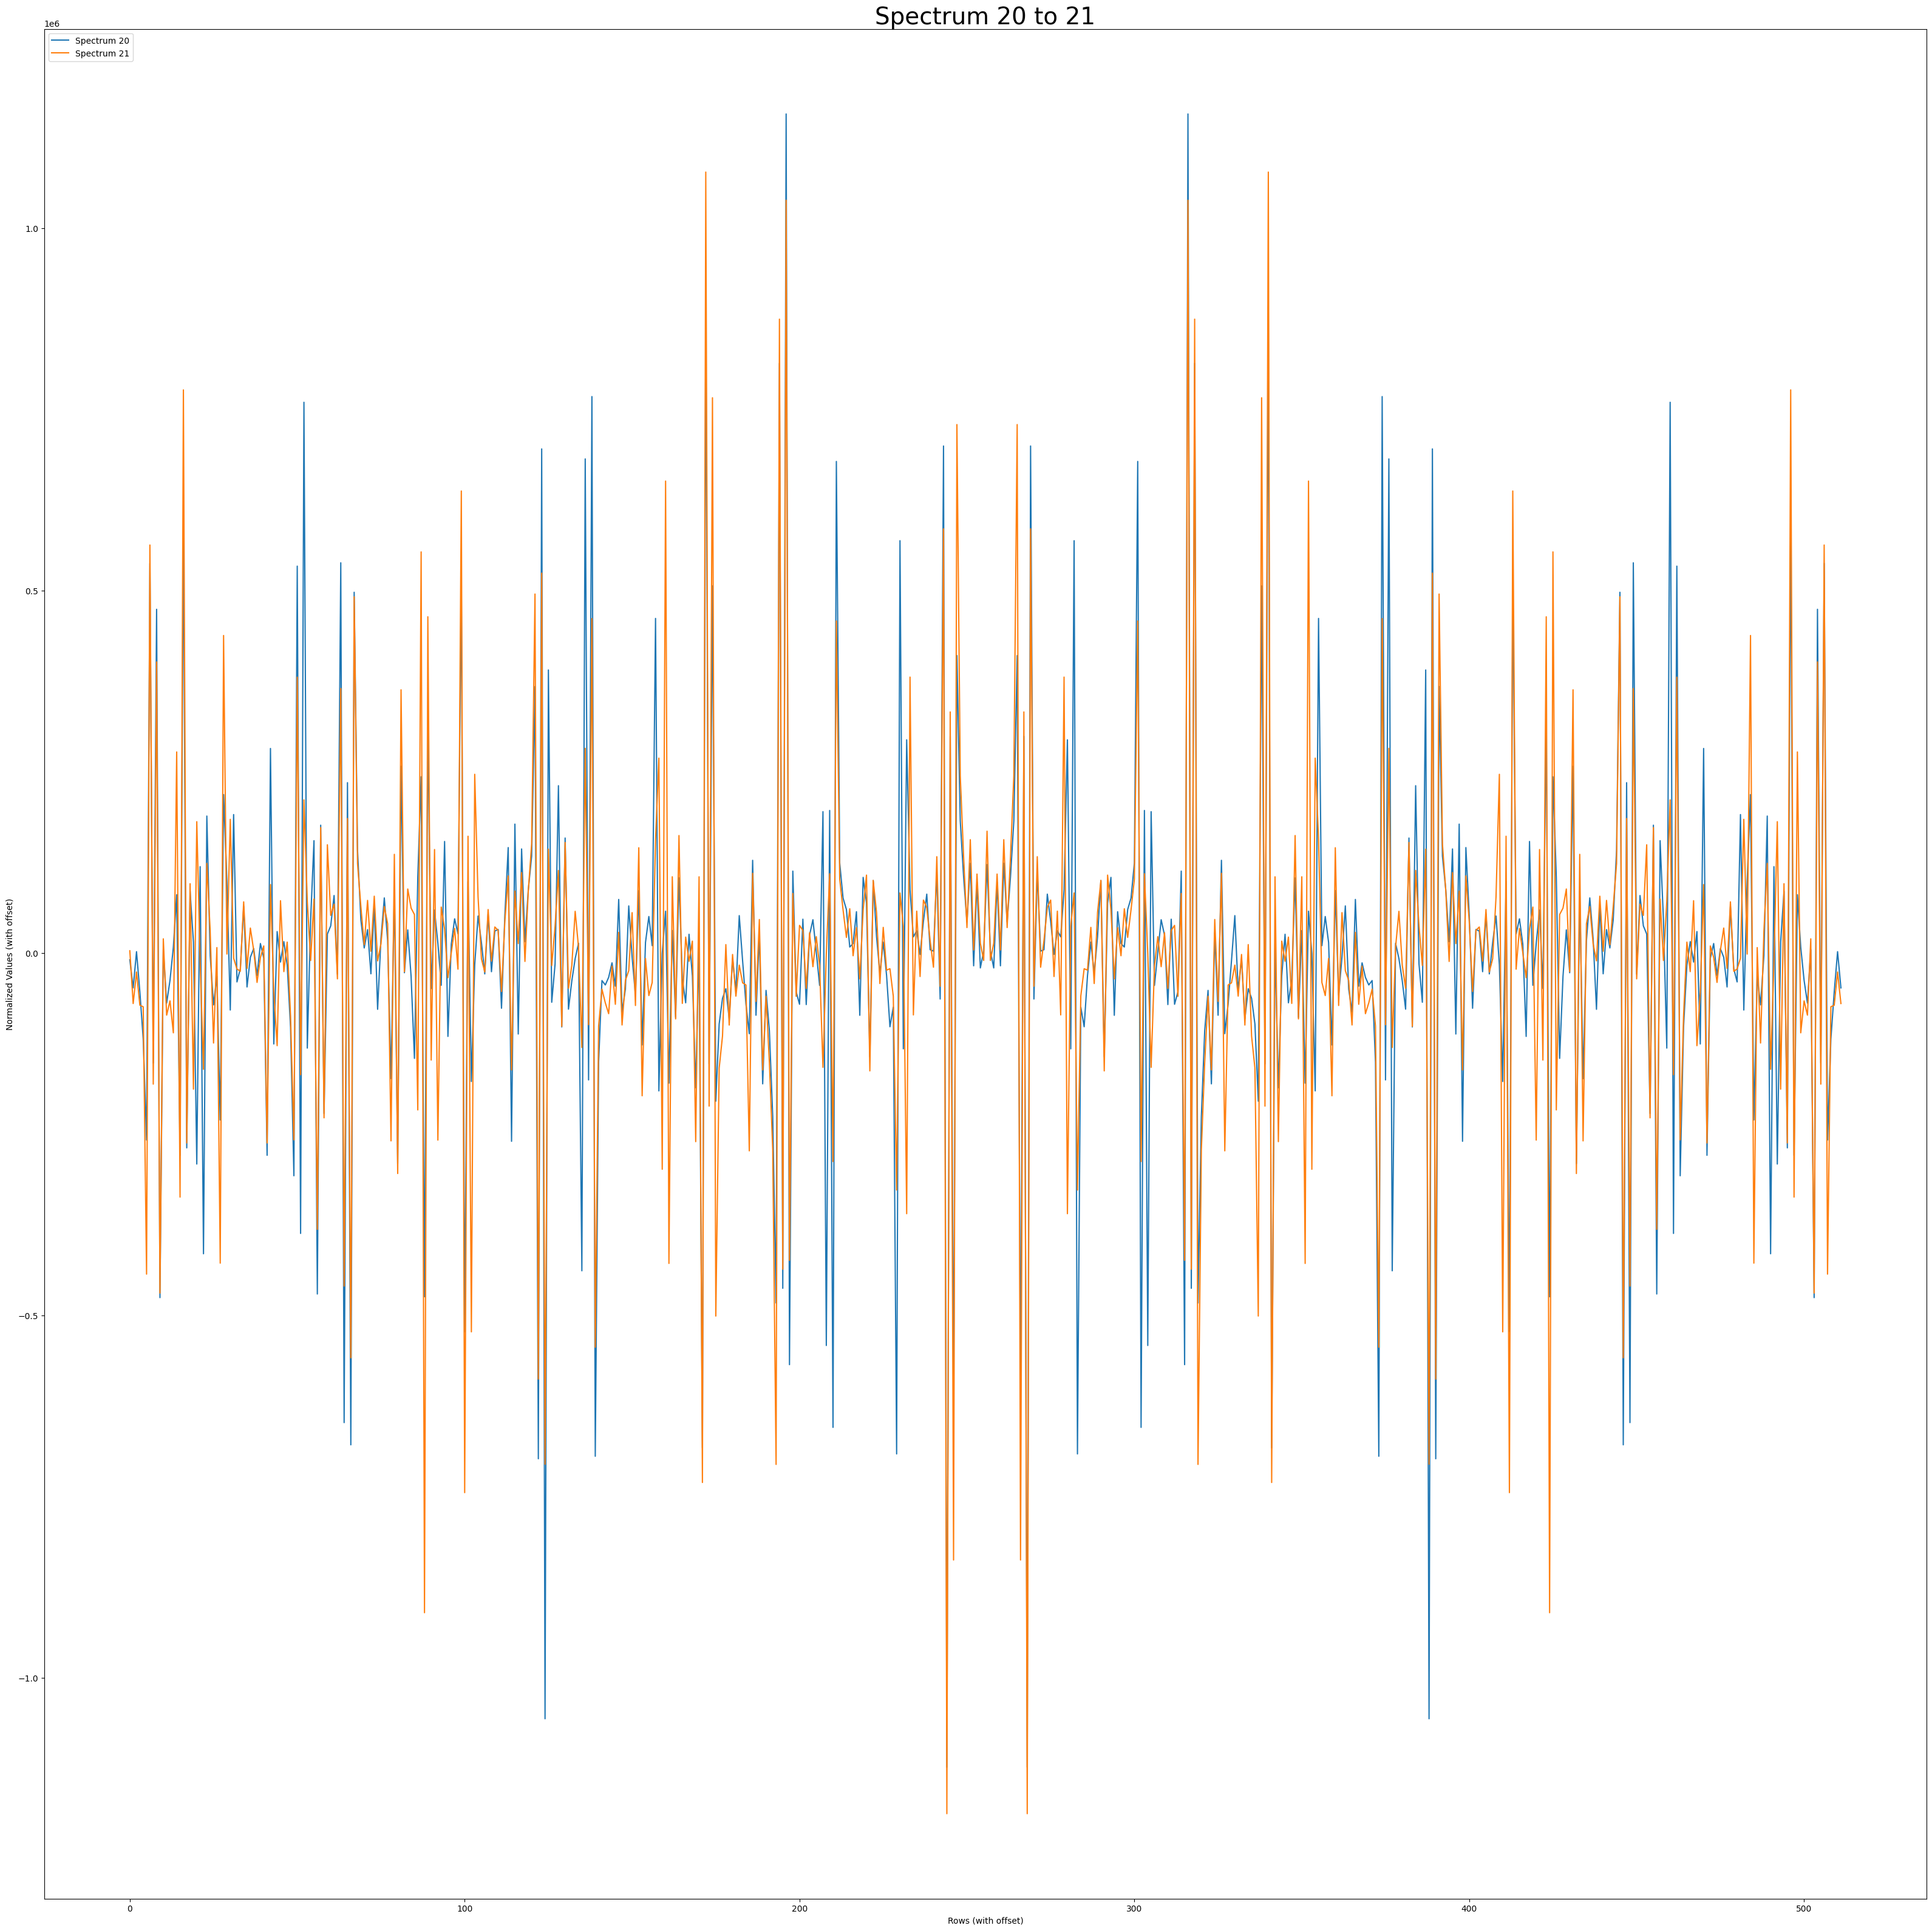

In [34]:
## REAL, output real part sepctrum 1 to 20, with 0 offset
plot_columns_with_offsets_no_norm(fft_data_dim1_real,20,21,0,0)

In [71]:
fft_data_dim2_abs[:, 0]

array([ 191974.        ,  243183.87372697,  249989.25761864,
         51515.9283278 ,   92712.13753506,  719384.34302977,
        947957.4039413 ,   27148.62824986,  855686.25388953,
        939878.44099331,  140399.40073849,  375054.49554778,
        182167.78730924,  427249.73123554,  872844.7124604 ,
        730267.41660693, 1293793.65329773,  436706.54841097,
        164847.14577401,  414976.9756673 ,  854887.78067753,
        436171.44735592,  762900.3211772 ,  210049.0169466 ,
        331746.35048565,  223291.39622564,   52436.68867568,
        921115.09435018, 1053018.39168904,  382530.70185881,
        880656.5003893 ,  850191.67250719,  127902.20330039,
        135848.17123545,  170493.56496998,   64914.87166167,
        168790.54077955,  302110.72815275,   82079.91394437,
        117902.60291527,  361738.55608709,  825582.77305241,
        700009.03615013,   54989.13576034,  947336.63474946,
        669483.14719919,  281354.52530568,  354146.13803895,
         25471.72122629,

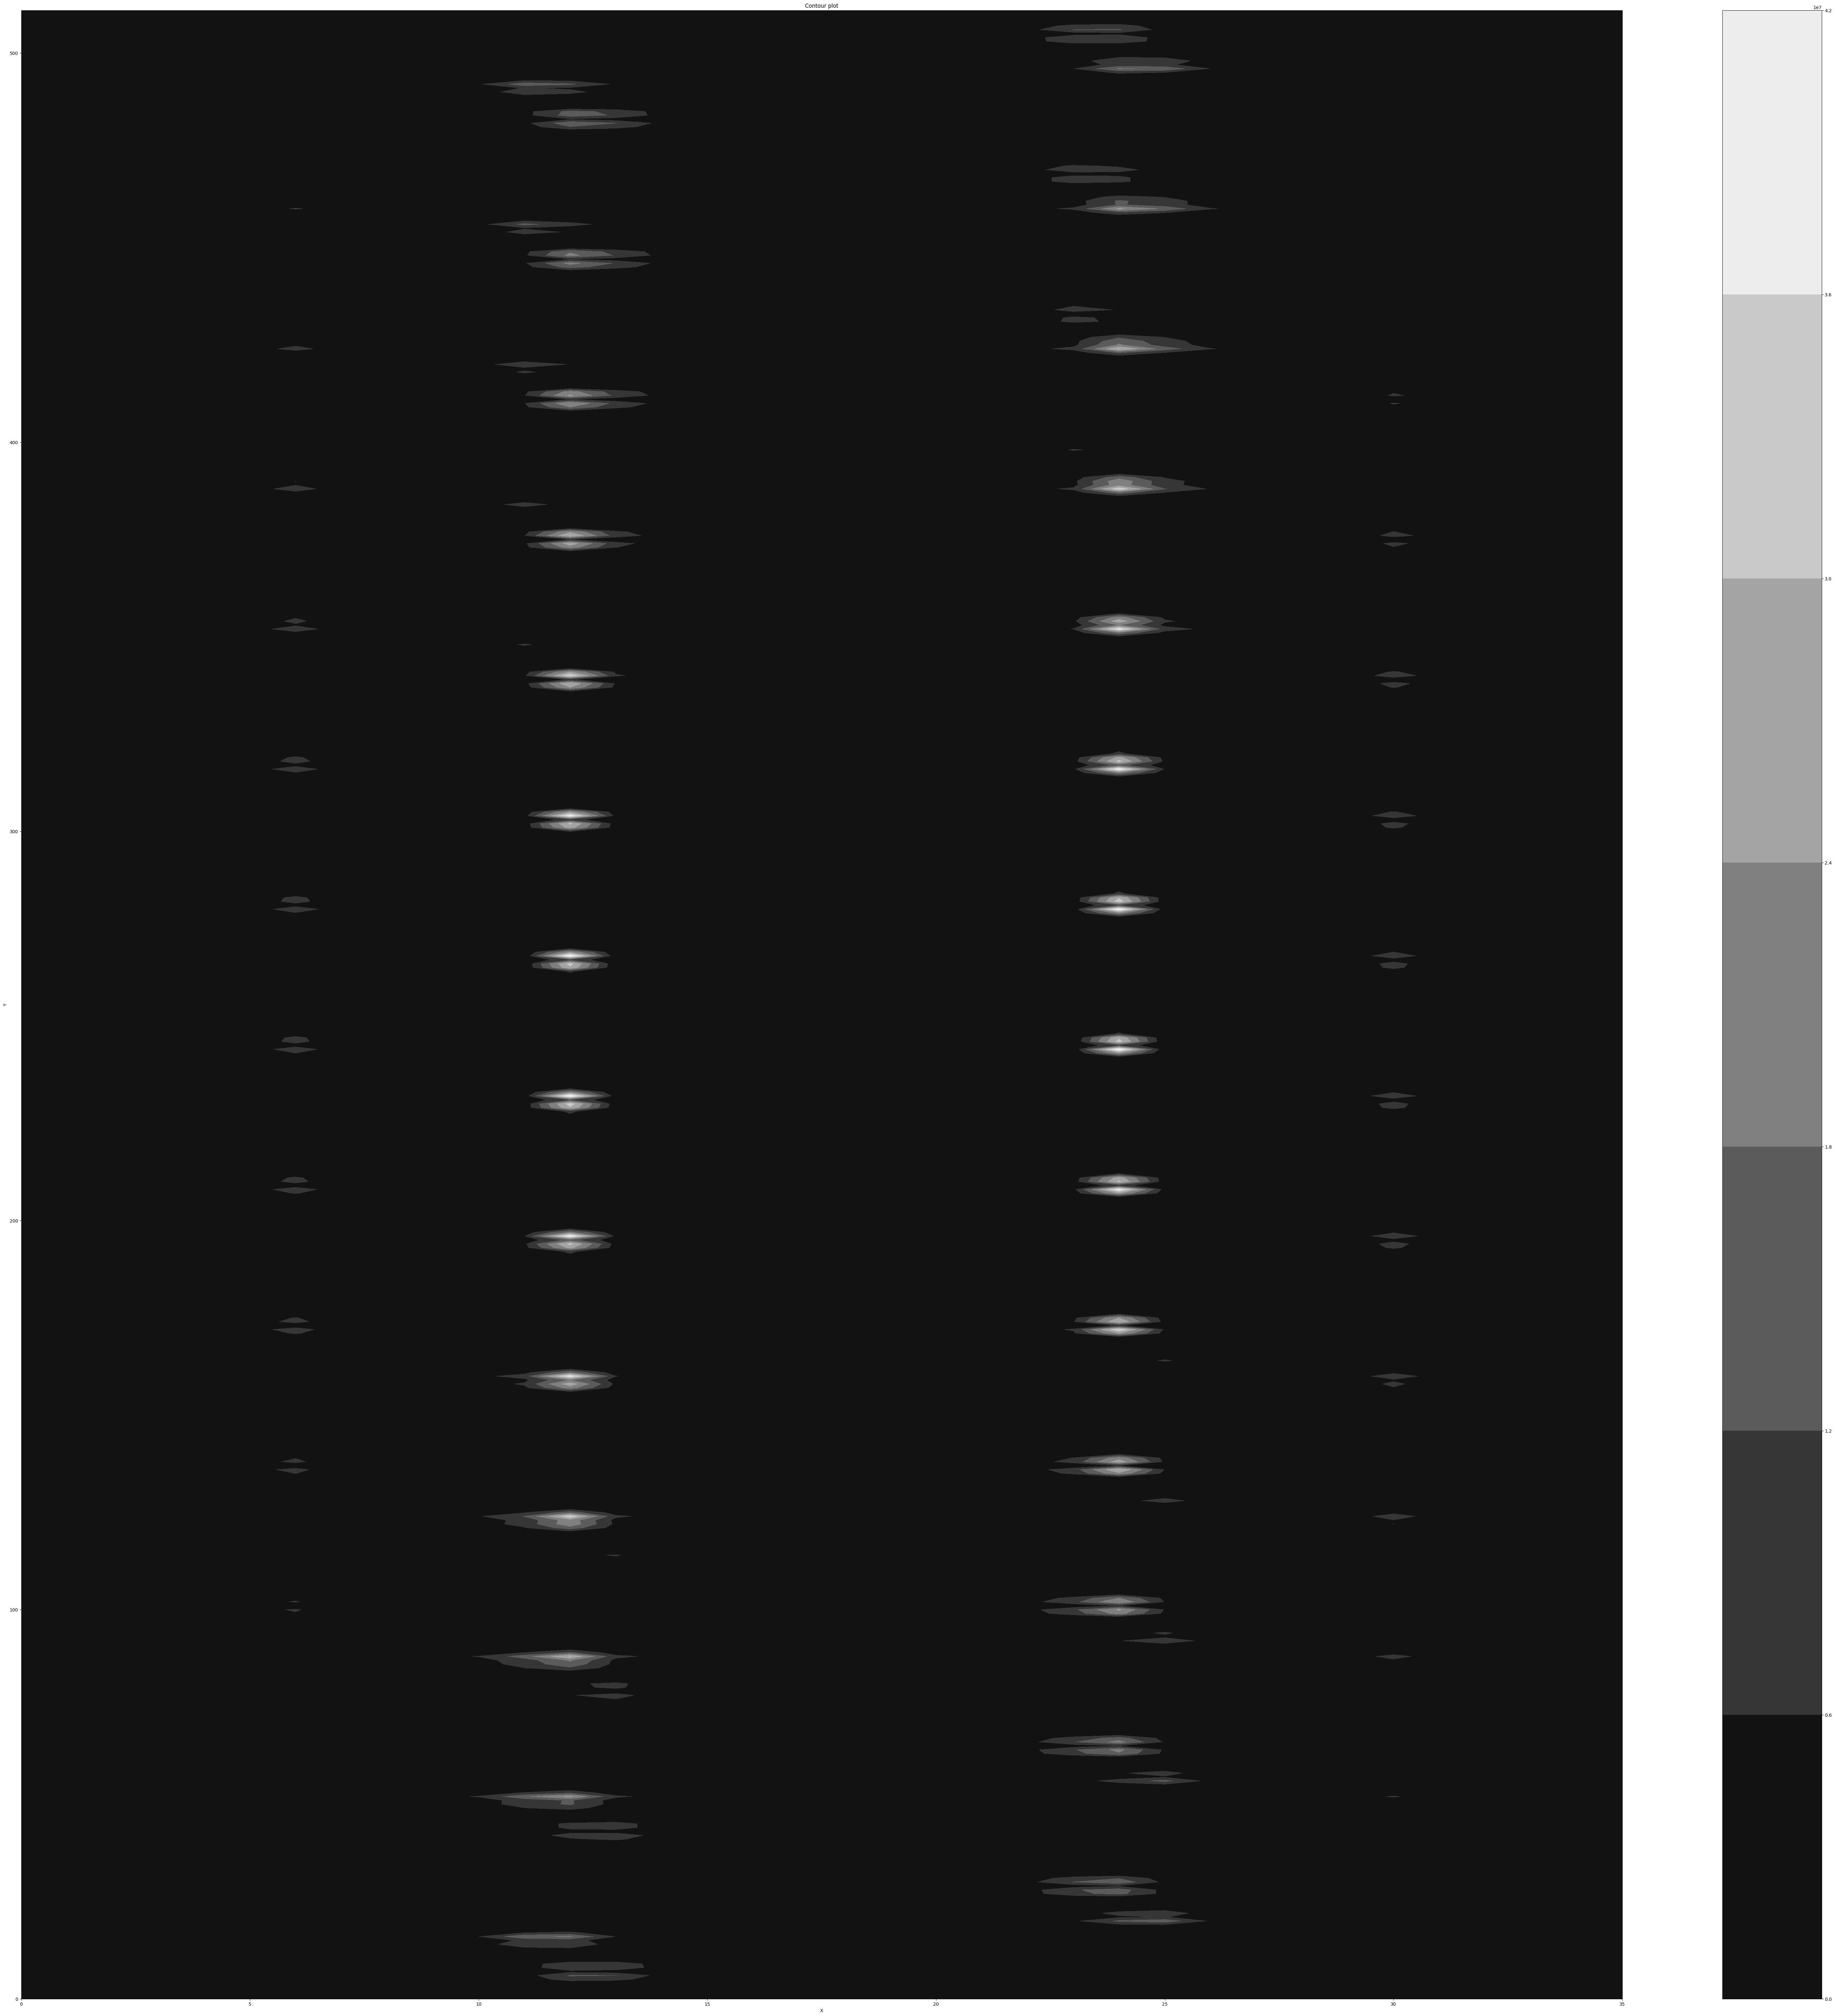

In [82]:
import matplotlib.pyplot as plt
import numpy as np

# assuming fft_data_dim2_abs is your 2D data
# generate grid for the contour plot
x = np.arange(0, fft_data_dim2_abs.shape[1])
y = np.arange(0, fft_data_dim2_abs.shape[0])
X, Y = np.meshgrid(x, y)

# create the contour plot
plt.figure(figsize=(80, 80))
plt.contourf(X, Y, fft_data_dim2_abs, cmap='gray') # Change colormap as per your preference
plt.colorbar()  # optional, to show color scale
plt.title('Contour plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

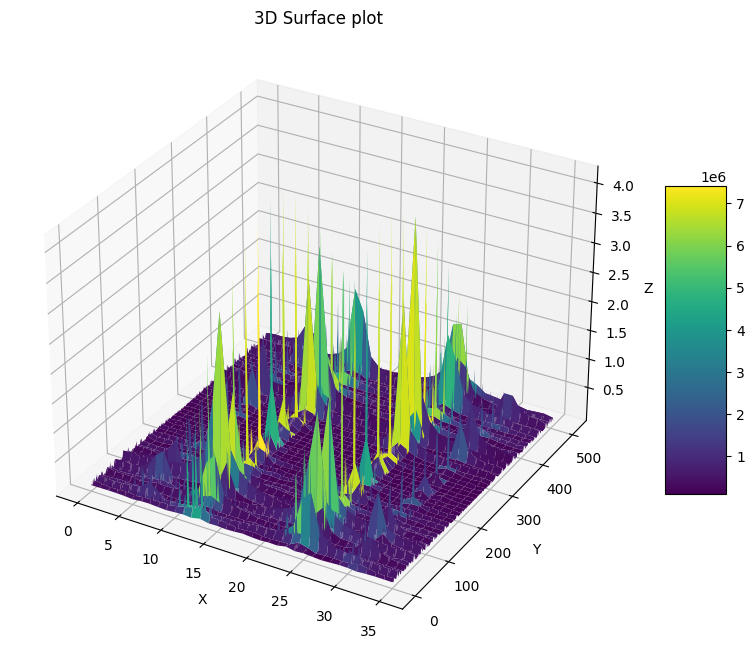

In [79]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# assuming fft_data_dim2_abs is your 2D data
# generate grid for the 3D plot
x = np.arange(0, fft_data_dim2_abs.shape[1])
y = np.arange(0, fft_data_dim2_abs.shape[0])
X, Y = np.meshgrid(x, y)

# create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, fft_data_dim2_abs, cmap='viridis')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_title('3D Surface plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [1]:
# install tools for pdf output

!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1
  libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby
  ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf libavalon-framework-java
  libcommons-logging-java-doc libexcalibu

In [ ]:
# output as PDF
!jupyter nbconvert --to pdf /content/drive/MyDrive/Colab_Notebooks/MRS_2D.ipynb --output-dir /content/